# Demo - Race Bias in Words Embedding
##  Exploratory - the API will be changed in a future release
Based on:
https://github.com/tolga-b/debiaswe/blob/master/tutorial_example1.ipynb

In [1]:
import matplotlib.pylab as plt

from ethically.we import BiasWordsEmbedding
from ethically.we.data import load_w2v_small, BOLUKBASI_DATA

In [2]:
w2v_small_model = load_w2v_small()

In [3]:
names = ["Emily", "Aisha", "Anne", "Keisha", "Jill", "Tamika", "Allison", "Lakisha", "Laurie", "Tanisha", "Sarah",
         "Latoya", "Meredith", "Kenya", "Carrie", "Latonya", "Kristen", "Ebony", "Todd", "Rasheed", "Neil", "Tremayne",
         "Geoffrey", "Kareem", "Brett", "Darnell", "Brendan", "Tyrone", "Greg", "Hakim", "Matthew", "Jamal", "Jay",
         "Leroy", "Brad", "Jermaine"]

group1 = names[::2]
group2 = names[1::2]

In [4]:
race_bias_we = BiasWordsEmbedding(w2v_small_model, verbose=True)

In [5]:
race_bias_we._identify_direction('group1', 'group2', [group1, group2], method='sum')

Identify direction using sum method...


In [6]:
profession_names = race_bias_we._filter_words_by_model(BOLUKBASI_DATA['gender']['profession_names'])

In [7]:
race_bias_we.calc_direct_bias(profession_names)

0.057185549110977264

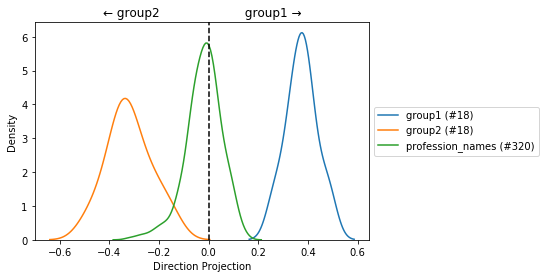

In [8]:
race_bias_we.plot_dist_projections_on_direction({'profession_names': profession_names,
                                                 'group1': group1,
                                                 'group2': group2})

In [9]:
race_bias_we.generate_analogies(30)

,x,y,distance,score
0,Sarah,Keisha,0.928895,0.670521
1,defensemen,cornerbacks,0.995745,0.371968
2,hipster,hip_hop,0.990213,0.359780
3,punter,cornerback,0.904813,0.352770
4,singer_songwriter,rapper,0.999137,0.343185
5,defenseman,defensive_tackle,0.965712,0.342796
6,pole_vault,triple_jump,0.463255,0.339006
7,musicians,artistes,0.859174,0.328106
8,tavern,barbershop,0.976077,0.306346
9,freestyle_relay,meter_hurdles,0.748041,0.301123


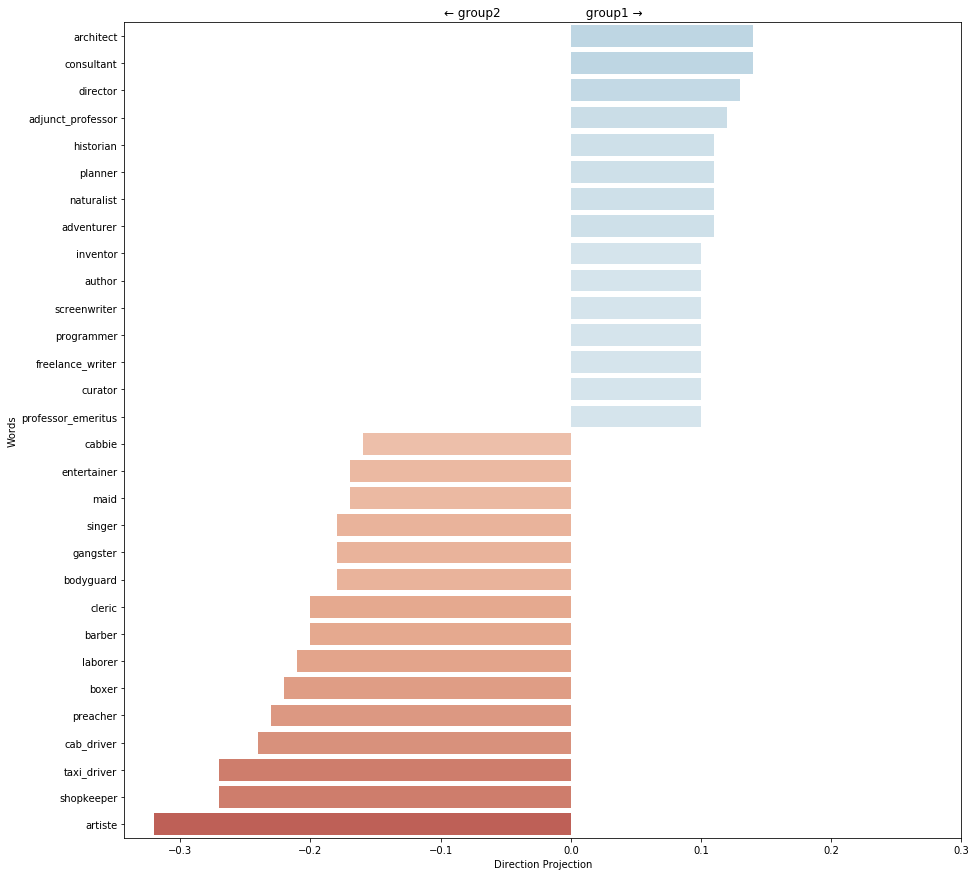

In [10]:
f, ax = plt.subplots(figsize=(15, 15))
race_bias_we.plot_projection_scores(profession_names, 15, ax=ax)